In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

city_data = pd.read_csv('../data/raw_data/CHDB_data_city_all v7_1.csv')
tract_data = pd.read_csv('../data/raw_data/CHDB_data_tract_all v7_1(big).csv')
city_data.head()

C:\Users\Billy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,state_abbr,state_fips,place_fips,stpl_fips,city_name,metric_name,group_name,metric_number,group_number,num,...,lci,uci,county_indicator,educ_indicator,multiplier_indicator,data_yr_type,geo_level,date_export,version,NOTE - NCHS Disclaimer
0,HI,15,3,15003,Honolulu,Absenteeism,total population,1,1,9625.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city,9/26/2019,7.1,The downloadable data tables shared on the Cit...
1,AL,1,7000,107000,Birmingham,Absenteeism,total population,1,1,2250.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city,9/26/2019,7.1,NaN
2,AL,1,35896,135896,Hoover,Absenteeism,total population,1,1,1517.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city,9/26/2019,7.1,NaN
3,AL,1,37000,137000,Huntsville,Absenteeism,total population,1,1,2376.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city,9/26/2019,7.1,NaN
4,AL,1,50000,150000,Mobile,Absenteeism,total population,1,1,2826.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,2015-2016,city,9/26/2019,7.1,NaN


In [3]:
tract_data.head()

,state_abbr,state_fips,county_fips,county_name,tract_code,stcotr_fips,city_name,metric_name,metric_number,group_name,group_number,num,denom,est,lci,uci,data_yr_type,geo_level,date_export,version
0,HI,15,3,Honolulu County,106,15003000106,Honolulu,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,NaN,-999.0,-999.0,2015,tract,9/19/2019,7.1
1,HI,15,3,Honolulu County,107,15003000107,Honolulu,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,NaN,-999.0,-999.0,2015,tract,9/19/2019,7.1
2,HI,15,3,Honolulu County,108,15003000108,Honolulu,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,NaN,-999.0,-999.0,2015,tract,9/19/2019,7.1
3,HI,15,3,Honolulu County,110,15003000110,Honolulu,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,NaN,-999.0,-999.0,2015,tract,9/19/2019,7.1
4,HI,15,3,Honolulu County,111,15003000111,Honolulu,Air pollution - particulate matter,2,total population,1,-999.0,-999.0,NaN,-999.0,-999.0,2015,tract,9/19/2019,7.1


In [4]:
print(city_data.shape)
tract_data.shape

(60500, 22)


(631295, 20)

In [5]:
print(city_data.columns.values)
tract_data.columns.values

['state_abbr' 'state_fips' 'place_fips' 'stpl_fips' 'city_name'
 'metric_name' 'group_name' 'metric_number' 'group_number' 'num' 'denom'
 'est' 'lci' 'uci' 'county_indicator' 'educ_indicator'
 'multiplier_indicator' 'data_yr_type' 'geo_level' 'date_export' 'version'
 'NOTE - NCHS Disclaimer']


array(['state_abbr', 'state_fips', 'county_fips', 'county_name',
       'tract_code', 'stcotr_fips', 'city_name', 'metric_name',
       'metric_number', 'group_name', 'group_number', 'num', 'denom',
       'est', 'lci', 'uci', 'data_yr_type', 'geo_level', 'date_export',
       'version'], dtype=object)

In [4]:
possiblenas = ['', -999]
def na_replace(df, nas):
    ''' simple function that replaces all missing values in dataframe with NaN values
    '''
    df2 = df.replace(to_replace=nas,value=np.nan)
    return(df2)

In [5]:
city_data = na_replace(city_data, possiblenas)
tract_data = na_replace(tract_data, possiblenas)

In [6]:
print(city_data.info())
tract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60500 entries, 0 to 60499
Data columns (total 22 columns):
state_abbr                60500 non-null object
state_fips                60500 non-null int64
place_fips                60500 non-null int64
stpl_fips                 60500 non-null int64
city_name                 60500 non-null object
metric_name               60500 non-null object
group_name                60500 non-null object
metric_number             60500 non-null int64
group_number              60500 non-null int64
num                       19421 non-null float64
denom                     19421 non-null float64
est                       54485 non-null float64
lci                       46560 non-null float64
uci                       46560 non-null float64
county_indicator          49185 non-null float64
educ_indicator            4386 non-null float64
multiplier_indicator      15717 non-null float64
data_yr_type              60302 non-null object
geo_level                

In [7]:
print(city_data.describe())
tract_data.describe()

        state_fips    place_fips     stpl_fips  metric_number  group_number  \
count  60500.00000  60500.000000  6.050000e+04   60500.000000  60500.000000   
mean      23.99600  42356.282000  2.438986e+06      21.578512      4.322314   
std       17.16464  24346.278823  1.718587e+06      11.062463      3.240308   
min        1.00000      3.000000  1.500300e+04       1.000000      1.000000   
25%        6.00000  21000.000000  6.700735e+05      11.000000      1.000000   
50%       19.00000  45000.000000  1.955965e+06      25.000000      4.000000   
75%       40.00000  62635.750000  4.053125e+06      30.000000      6.000000   
max       56.00000  88940.000000  5.613900e+06      37.000000     18.000000   

                num         denom           est           lci           uci  \
count  1.942100e+04  1.942100e+04  54485.000000  46560.000000  46560.000000   
mean   1.245721e+04  4.474203e+04    468.094553    513.874839    573.218902   
std    4.803710e+04  1.702946e+05   1815.247036   1

,state_fips,county_fips,tract_code,stcotr_fips,metric_number,group_number,num,denom,est,lci,uci,version
count,631295.000000,631295.000000,631295.000000,6.312950e+05,631295.000000,631295.0,174583.000000,174583.000000,588313.000000,472157.000000,472157.000000,6.312950e+05
mean,25.839156,95.668755,129555.791001,2.593495e+10,14.560999,1.0,703.682496,2471.474353,25.984848,25.404014,31.823865,7.100000e+00
std,16.758504,124.328758,214592.544700,1.680352e+10,8.852314,0.0,1189.729979,1864.095898,24.822515,22.602011,23.814115,3.759129e-11
min,1.000000,1.000000,100.000000,1.073000e+09,2.000000,1.0,0.000000,0.000000,-100.000000,-862.900000,0.000000,7.100000e+00
25%,8.000000,31.000000,4602.000000,8.001009e+09,7.000000,1.0,125.000000,1197.000000,9.600000,9.800000,14.000000,7.100000e+00
50%,26.000000,63.000000,20600.000000,2.608100e+10,14.000000,1.0,318.000000,1982.000000,19.000000,18.500000,24.300000,7.100000e+00
75%,40.000000,109.000000,127600.000000,4.010911e+10,21.000000,1.0,694.000000,3253.000000,36.900000,32.900000,42.900000,7.100000e+00
max,56.000000,810.000000,991703.000000,5.602198e+10,37.000000,1.0,24507.000000,44754.000000,100.000000,100.000000,878.900000,7.100000e+00


In [56]:
# currently only looking at total population level; however, could easily come back here to divide it out
# into demographic data. Which is what group_number represents. 
total_pop = city_data[city_data.group_number == 1]
total_pop_select = total_pop.loc[:, ['stpl_fips','metric_name','est']]
city_table = total_pop_select.pivot(index='stpl_fips',columns='metric_name',values='est')
print(city_table.info())
city_table.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 15003 to 5613900
Data columns (total 36 columns):
Absenteeism                               500 non-null float64
Air pollution - particulate matter        498 non-null float64
Binge drinking                            500 non-null float64
Breast cancer deaths                      492 non-null float64
Cardiovascular disease deaths             494 non-null float64
Children in Poverty                       500 non-null float64
Colorectal cancer deaths                  492 non-null float64
Dental care                               500 non-null float64
Diabetes                                  500 non-null float64
Frequent mental distress                  500 non-null float64
Frequent physical distress                500 non-null float64
High blood pressure                       500 non-null float64
High school graduation                    478 non-null float64
Housing cost, excessive                   500 non-null float64
Housi

metric_name,Absenteeism,Air pollution - particulate matter,Binge drinking,Breast cancer deaths,Cardiovascular disease deaths,Children in Poverty,Colorectal cancer deaths,Dental care,Diabetes,Frequent mental distress,...,Prenatal care,Preventive services,Racial/ethnic diversity,Smoking,Teen births,Third-grade reading proficiency,Unemployment,Uninsured,Violent crime,Walkability
count,500.000000,498.000000,500.000000,492.000000,494.000000,500.000000,492.000000,500.000000,500.000000,500.000000,...,246.000000,500.000000,500.000000,500.000000,273.000000,499.000000,500.000000,500.00000,468.000000,500.000000
mean,18.073200,9.191165,17.656200,24.428049,210.440486,22.625400,16.099187,63.196000,9.997800,12.833200,...,77.635366,32.585800,64.086800,17.394000,24.361172,46.192585,7.169400,12.86000,513.545940,44.509000
std,9.341169,1.692985,2.684346,6.056955,58.725131,10.899536,4.207326,7.546653,2.397196,2.061543,...,8.518360,4.954973,14.622094,4.098042,13.346916,17.990903,2.694908,5.69098,366.814577,15.788077
min,0.000000,4.900000,9.100000,11.300000,46.700000,2.400000,4.100000,42.300000,4.200000,7.900000,...,52.000000,18.400000,13.700000,8.600000,0.800000,11.200000,3.000000,2.00000,19.600000,6.500000
25%,11.800000,7.900000,16.000000,20.300000,171.350000,14.375000,13.500000,57.600000,8.275000,11.400000,...,71.900000,29.500000,55.600000,14.300000,14.300000,31.600000,5.300000,9.00000,242.875000,33.700000
50%,16.250000,9.150000,17.550000,23.700000,202.750000,22.150000,15.700000,63.300000,9.800000,12.900000,...,77.600000,32.450000,66.000000,17.100000,24.600000,44.200000,6.650000,11.95000,416.900000,41.500000
75%,22.500000,10.300000,19.200000,27.900000,236.825000,29.725000,18.325000,68.700000,11.500000,14.300000,...,85.250000,35.925000,74.925000,20.100000,33.600000,58.650000,8.425000,15.90000,697.650000,54.350000
max,65.800000,15.700000,27.400000,50.600000,515.200000,60.000000,34.300000,81.800000,21.600000,18.400000,...,94.300000,47.700000,94.300000,29.700000,84.800000,91.100000,22.200000,35.20000,2044.400000,94.200000


In [55]:
tract_select = tract_data.loc[:, ['stcotr_fips','metric_name','est']]
#there were duplicated values here, but they could just be averaged together, because they were always exactly
#the same because they were duplicate values for every measure. The reason they were duplicated was because 
# in some cities there are census tracts that go through both cities. For example, census tract 30213 in 
# Alabama is partly in Birmingham, AL and partly in Hoover, AL. Thus, it is repeated for each city, however,
# they are the same value. 
tract_table =tract_select.pivot_table(index='stcotr_fips', columns='metric_name',values='est',aggfunc=np.mean)
print(tract_table.info())
tract_table.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28527 entries, 1073000100 to 56021980801
Data columns (total 21 columns):
Air pollution - particulate matter    28231 non-null float64
Binge drinking                        26968 non-null float64
Children in Poverty                   28078 non-null float64
Dental care                           26968 non-null float64
Diabetes                              26968 non-null float64
Frequent mental distress              26968 non-null float64
Frequent physical distress            26968 non-null float64
High blood pressure                   26962 non-null float64
Housing cost, excessive               28262 non-null float64
Housing with potential lead risk      28272 non-null float64
Income Inequality                     28262 non-null float64
Lead exposure risk index              28262 non-null float64
Life expectancy                       25360 non-null float64
Limited access to healthy foods       28293 non-null float64
Obesity               

metric_name,Air pollution - particulate matter,Binge drinking,Children in Poverty,Dental care,Diabetes,Frequent mental distress,Frequent physical distress,High blood pressure,"Housing cost, excessive",Housing with potential lead risk,...,Lead exposure risk index,Life expectancy,Limited access to healthy foods,Obesity,Physical inactivity,Preventive services,Racial/ethnic diversity,Smoking,Unemployment,Uninsured
count,28231.000000,26968.000000,28078.000000,26968.000000,26968.000000,26968.000000,26968.000000,26962.000000,28262.000000,28272.000000,...,28262.000000,25360.000000,28293.000000,26968.000000,26968.000000,26911.000000,28347.000000,26968.000000,28295.000000,28297.000000
mean,9.428958,17.643291,24.052639,61.198369,10.826940,13.123206,12.774074,30.543900,38.123512,23.349335,...,5.565494,78.112275,53.178871,30.125200,25.502816,30.697104,54.793597,18.124871,7.955582,13.470424
std,1.603343,4.152471,20.341042,12.950410,4.292705,3.414342,4.136524,8.305887,12.457684,17.400265,...,2.863762,4.277779,36.950816,8.239648,9.313972,7.387103,20.001796,6.056581,5.746834,8.994300
min,3.600000,3.200000,0.000000,18.900000,0.800000,4.100000,3.200000,4.900000,0.000000,0.000000,...,1.000000,59.000000,0.000000,9.100000,7.100000,6.300000,0.000000,2.000000,0.000000,0.000000
25%,8.400000,15.000000,6.600000,51.300000,7.900000,10.500000,9.600000,25.300000,29.000000,7.300000,...,3.000000,75.500000,15.800000,24.000000,18.100000,24.800000,41.500000,13.600000,4.100000,6.700000
50%,9.500000,17.300000,19.500000,62.800000,10.000000,12.700000,12.100000,29.300000,37.400000,19.800000,...,6.000000,78.500000,58.100000,29.200000,24.200000,30.900000,57.300000,17.300000,6.500000,11.500000
75%,10.600000,19.900000,37.700000,71.700000,13.000000,15.400000,15.500000,34.600000,46.575000,37.700000,...,8.000000,81.100000,89.000000,35.200000,32.000000,36.300000,70.000000,21.800000,10.100000,18.300000
max,16.300000,44.800000,98.300000,88.900000,42.100000,29.400000,35.800000,71.000000,100.000000,68.000000,...,10.000000,94.200000,100.000000,57.500000,62.100000,54.100000,99.200000,51.400000,92.800000,100.000000


# Missing Values

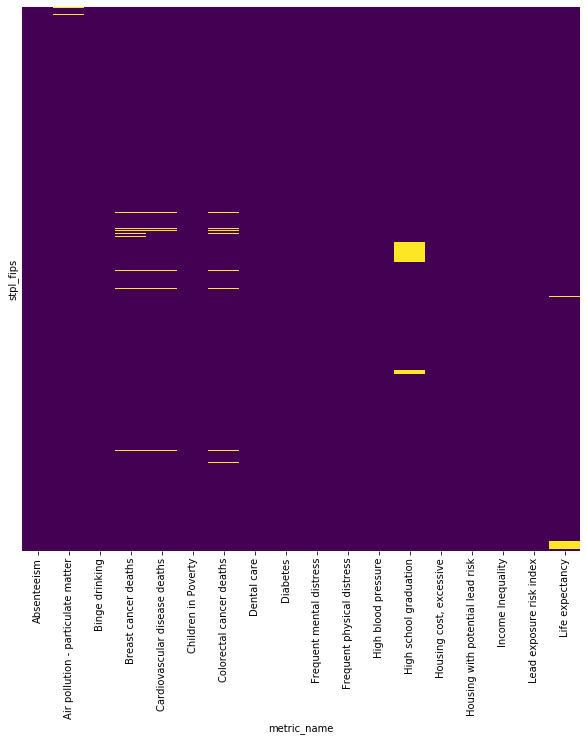

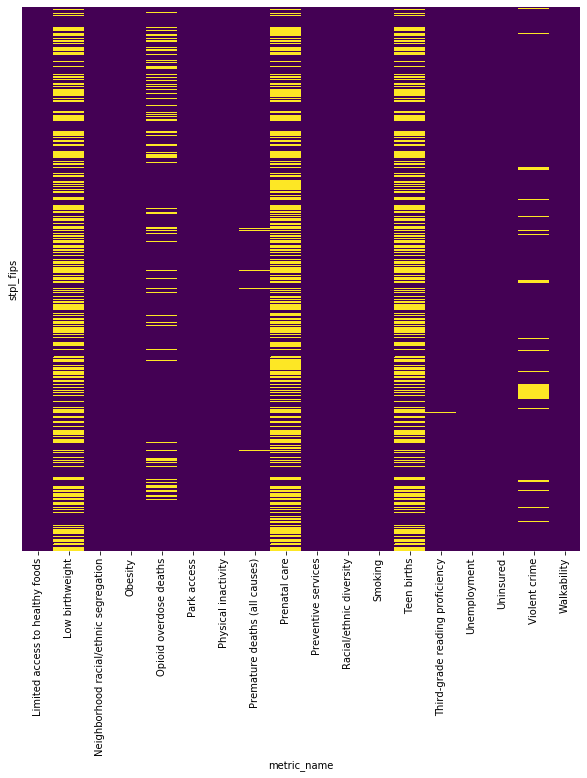

In [77]:
first_features_city = city_table.iloc[:, :18]
second_features_city = city_table.iloc[:,18:]
plt.figure(figsize=(10,10))
sns.heatmap(first_features_city.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(second_features_city.isnull(),cbar=False, yticklabels=False, cmap='viridis')

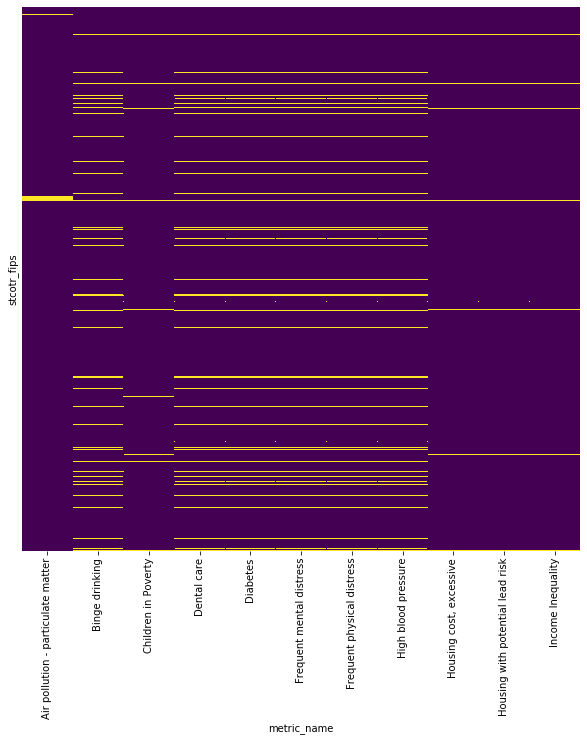

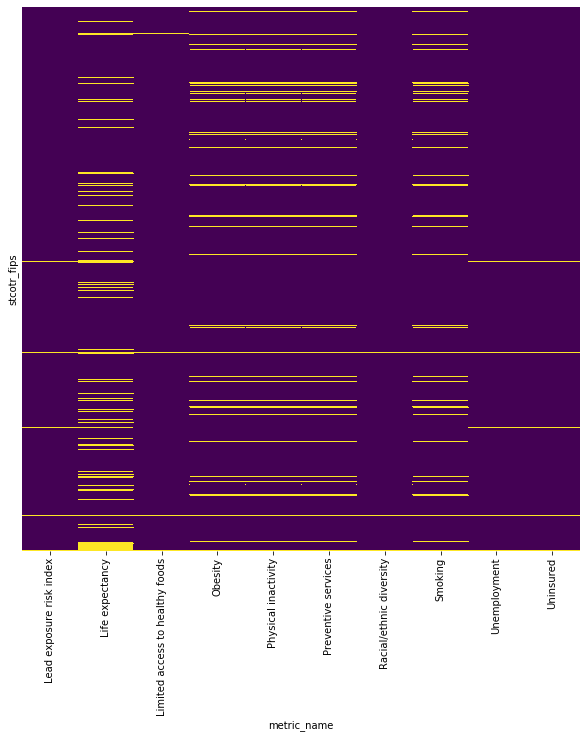

In [78]:
first_features_tract = tract_table.iloc[:, :11]
second_features_tract = tract_table.iloc[:,11:]
plt.figure(figsize=(10,10))
sns.heatmap(first_features_tract.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(second_features_tract.isnull(),cbar=False, yticklabels=False, cmap='viridis')

# Correlation

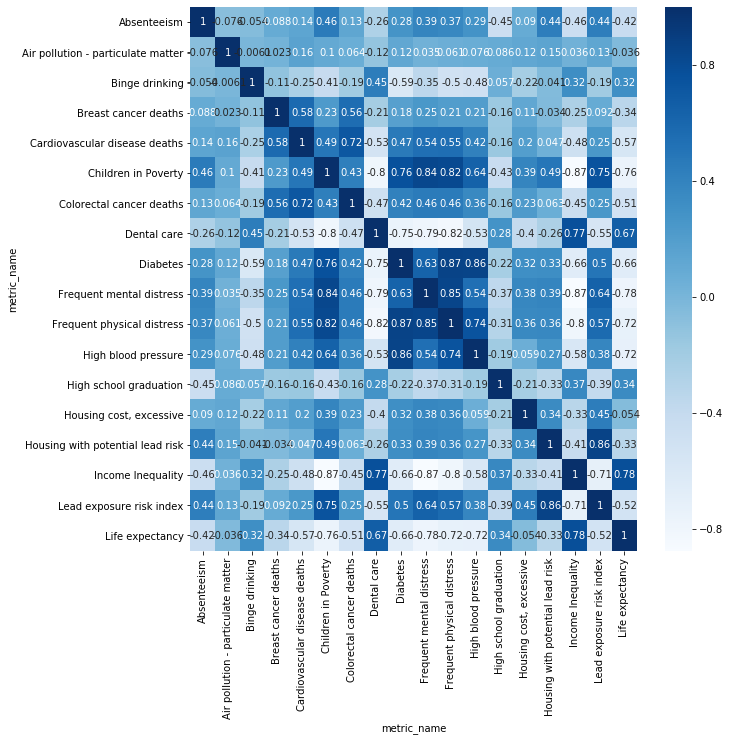

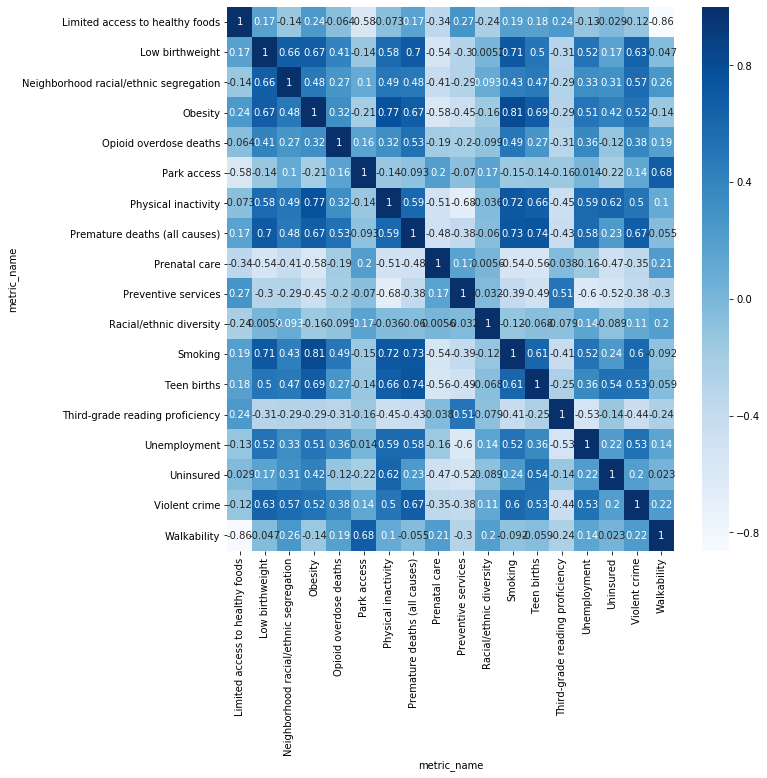

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(first_features_city.corr(), cmap='Blues', annot=True)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(second_features_city.corr(), cmap='Blues', annot=True)

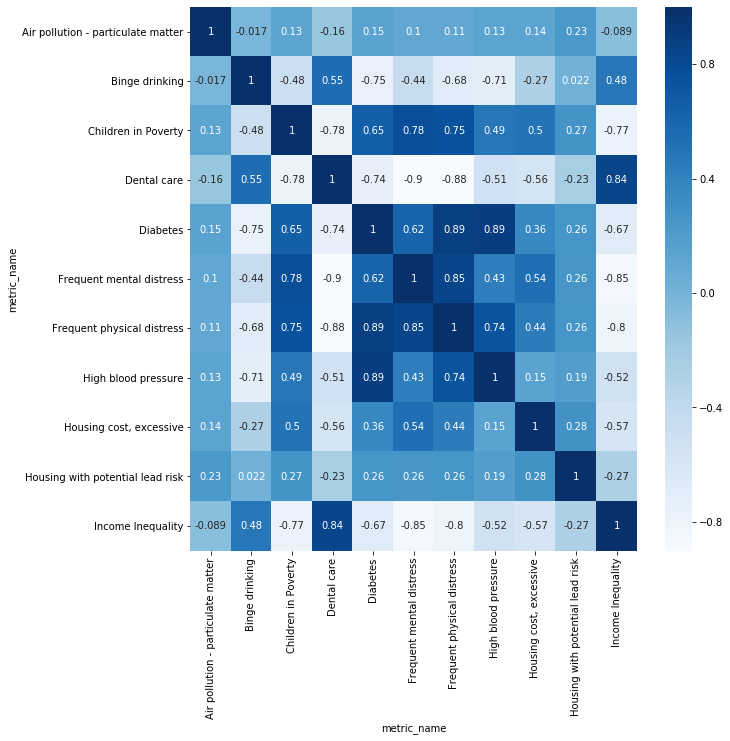

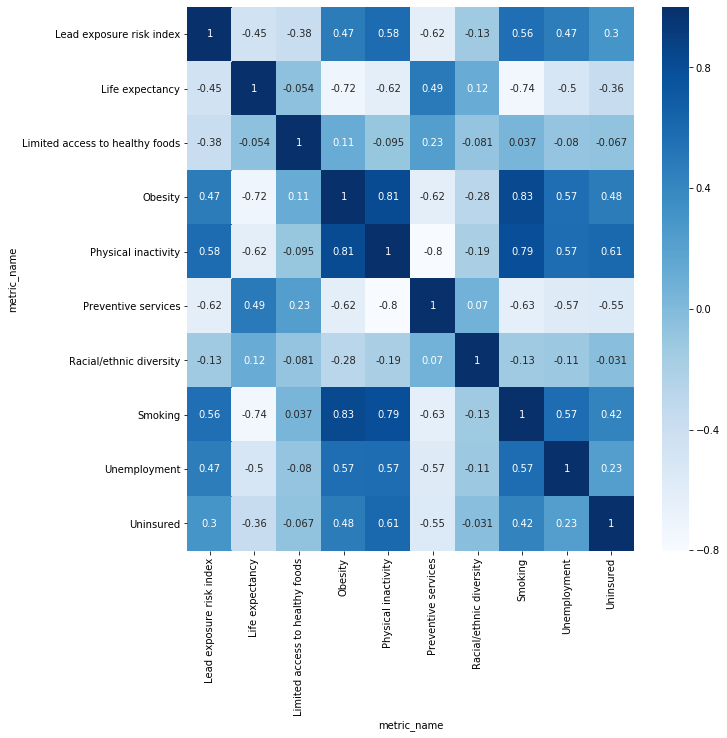

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(first_features_tract.corr(), cmap='Blues', annot=True)
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(second_features_tract.corr(), cmap='Blues', annot=True)

# Outliers

# Skewness